In [0]:
import numpy as np
import math
from matplotlib import pyplot as plt
from skimage import io

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
!ls '/content/gdrive/My Drive/CMPUT 206 Wi19/Lab4_Files/'
path='/content/gdrive/My Drive/CMPUT 206 Wi19/Lab4_Files/'
#filename_RGBimage = path +'PeppersRGB.bmp'
filename_Grayimage = path +'PeppersBayerGray.bmp'
filename_gridB = path +'gridB.bmp'
filename_gridR = path +'gridR.bmp'
filename_gridG = path +'gridG.bmp'

gridB.bmp  gridR.bmp  Part1.ipynb  PeppersBayerGray.bmp
gridG.bmp  lena.png   Part2.ipynb  PeppersRGB.bmp


(<matplotlib.image.AxesImage at 0x7fe4226f0940>, Text(0.5, 1.0, 'Original'))

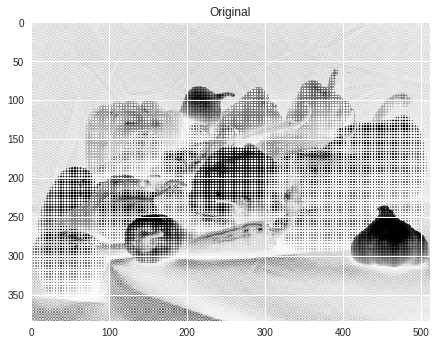

In [4]:
img = io.imread(filename_Grayimage, as_grey =True)
plt.imshow(img), plt.title('Original')



A B C D 

E F G H 

I J K L 

M N O P 



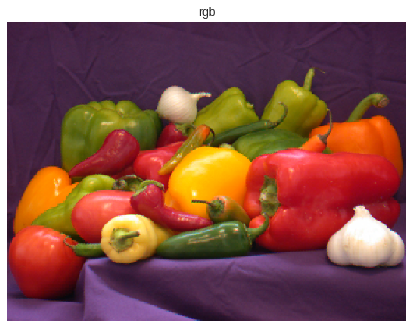

In [5]:

# part I

img = io.imread(filename_Grayimage, as_grey =True)

h,w = img.shape

# our final image will be a 3 dimentional image with 3 channels
rgb = np.zeros((h,w,3),np.uint8);


# reconstruction of the green channel IG

IG = np.copy(img) # copy the image into each channel

print('A B C D \n')
print('E F G H \n')
print('I J K L \n')
print('M N O P \n')


for row in range(0,h,4): # loop step is 4 since our mask size is 4.
    for col in range(0,w,4): # loop step is 4 since our mask size is 4.
        #B = (A + c)/2
        IG[row, col+1] = (int(img[row, col])+int(img[row, col+2]))/2 
        #D = (C + H)/2
        IG[row, col+3] = (int(img[row, col + 2]) + int(img[row + 1, col + 3])) / 2
        #E = (A + I)/2
        IG[row+1, col] = (int(img[row, col]) + int(img[row+2, col])) / 2
        #G = (C + F + H +K)/4
        IG[row+1, col+2] = (int(img[row+1, col+1]) + int(img[row+1, col+3])+int(img[row, col+2])+int(img[row+2, col+2]))/4
        #J = (F + I + K +N)/4
        IG[row+2, col+1] = (int(img[row+2, col]) + int(img[row+2, col+2])+int(img[row+1, col+1])+int(img[row+3, col+1]))/4
        #L = (H + P)/2
        IG[row+2, col+3] = (int(img[row+1, col+3]) + int(img[row+3, col+3])) / 2
        #M = (I + N)/2
        IG[row+3, col] = (int(img[row+2, col]) + int(img[row+3, col+1])) / 2
        #O = (N + P)/2
        IG[row+3, col+2] = (int(img[row + 3, col + 1]) + int(img[row + 3, col + 3])) / 2

# reconstruction of the red channel IR
IR = np.copy(img)

for row in range(0, h, 4):
    for col in range(0, w, 4):
        #A += B
        IR[row, col] = IR[row, col+1]
        #C = (B + D)/2
        IR[row, col+2] = (int(img[row, col+1])+int(img[row, col+3]))/2
        #F = (B + J)/2
        IR[row + 1, col + 1] = (int(img[row, col+1])+int(img[row+2, col+1]))/2
        #E += F 
        IR[row + 1, col] = IR[row + 1, col + 1]
        #G = (B + D + J +L)/4
        IR[row + 1, col + 2] = (int(img[row, col+1])+int(img[row+2, col+1])+int(img[row, col + 3]) + int(img[row + 2, col + 3]))/4
        #H = (D + L)/2 
        IR[row + 1, col + 3] = (int(img[row, col + 3]) + int(img[row + 2, col + 3])) / 2
        #I += J
        IR[row + 2, col] = IR[row + 2, col + 1]
        #K = (J + L)/2
        IR[row + 2, col + 2] = (int(img[row + 2, col+1])+int(img[row + 2, col + 3]))/2
        #N += J
        IR[row + 3, col + 1] = IR[row + 2, col + 1]
        #M += N
        IR[row + 3, col] = IR[row + 3, col + 1]
        #O += K
        IR[row + 3, col + 2] = IR[row + 2, col + 2]
        #P += L
        IR[row + 3, col + 3] = IR[row + 2, col + 3]

# reconstruction of the blue channel IB
IB = np.copy(img)

for row in range(0, h, 4):
    for col in range(0, w, 4):
        #F += (E + G)/2
        IB[row + 1, col + 1] = (int(img[row + 1, col])+int(img[row + 1, col + 2]))/2
        #I = (E + M)/2
        IB[row + 2, col] = (int(img[row + 1, col])+int(img[row + 3, col]))/2
        #J = (E+G+O+M)/4
        IB[row + 2, col + 1] = (int(img[row + 1, col])+int(img[row + 3, col]) + int(img[row + 1, col + 2]) + int(img[row + 3, col + 2]))/4
        #K = (G + O)/2
        IB[row + 2, col + 2] = (int(img[row + 1, col + 2]) + int(img[row + 3, col + 2])) / 2
        #N = (M + O)/2
        IB[row + 3, col + 1] = (int(img[row + 3, col])+int(img[row + 3, col + 2]))/2
        #A = E
        IB[row, col] = IB[row + 1, col]
        #B = F
        IB[row, col + 1] = IB[row + 1, col + 1]
        #C = G
        IB[row, col + 2] = IB[row + 1, col + 2]
        #D = C
        IB[row, col + 3] = IB[row, col + 2]
        #H = G
        IB[row + 1, col + 3] = IB[row + 1, col + 2]
        #L = K
        IB[row + 2, col + 3] = IB[row + 2, col + 2]
        #P = O
        IB[row + 3, col + 3] = IB[row + 3, col + 2]



# merge the channels

# Red Channel
rgb[:,:,0]=IR
# Green Channel
rgb[:, :, 1] = IG
# Blue Channel
rgb[:, :, 2] = IB




plt.imshow(rgb),plt.title('rgb')
plt.xticks([]), plt.yticks([])
plt.show()